In [3]:
# Core libraries for data handling

import pandas as pd        #  for loading, cleaning, and manipulating tabular data
import numpy as np         #  for numerical operations and array handling

# Visualization libraries
import matplotlib.pyplot as plt    #  for creating basic plots like line, bar, scatter, etc.
import seaborn as sns              #  for advanced and styled statistical plots

# Optional: For clustering and regression analysis
from sklearn.cluster import KMeans         #  for grouping similar houses based on features
from sklearn.linear_model import LinearRegression  #  for predicting house prices using regression
from sklearn.preprocessing import StandardScaler   #  for scaling features before clustering or regression

# Optional: For handling date and time columns
import datetime as dt        #  for working with date and time values


In [77]:
#  Load the Excel dataset


df = pd.read_excel("housing_data.xlsx")   

df.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,SC60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,Feb,2008,WD,Normal,208500
1,1,SC20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,No,No,No,0,May,2007,WD,Normal,181500
2,2,SC60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Sep,2008,WD,Normal,223500
3,3,SC70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Feb,2006,WD,Abnorml,140000
4,4,SC60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,No,No,No,0,Dec,2008,WD,Normal,250000


In [5]:
#  Inspect the dataset


df.info()        # Shows column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()    #  summary statistics like mean, min, max, std for numeric columns


,Unnamed: 0,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2007.815753,180921.195890
std,421.610009,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,1.328095,79442.502883
min,0.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,34900.000000
25%,364.750000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,129975.000000
50%,729.500000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,163000.000000
75%,1094.250000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,214000.000000
max,1459.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,2010.000000,755000.000000


In [7]:
df.shape         #  number of rows and columns

(1460, 81)

In [8]:
df.columns       #  all column names

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [10]:
# Safe drop: this will only remove columns if they exist

for col in ['Alley', 'MasVnrType']:
    if col in df.columns:
        df = df.drop(columns=[col])

In [11]:
df.shape         #  number of rows and columns

(1460, 79)

In [12]:
# Fill GarageYrBlt with YearBuilt
if 'GarageYrBlt' in df.columns:
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['YearBuilt'])

# We checked if the garage year column exists.
# If it does, we replaced any missing garage years with the year the house was built.
# This way, the column has no empty values and stays logical.

In [13]:
# Fill Electrical with mode
if 'Electrical' in df.columns:
    df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


# We checked if the Electrical column exists.
# Then we replaced any missing electrical system values with the most common one in the dataset.
# This way, the column has no empty values and stays consistent.

In [14]:
df.columns       #  all column names

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [15]:
#  total missing values in each column
df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 79, dtype: int64

In [16]:
#  total missing values in the whole dataset
df.isnull().sum().sum()

np.int64(0)

In [17]:
#  how many missing values per column (only showing columns with missing values)
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [ ]:
# Univariate Analysis

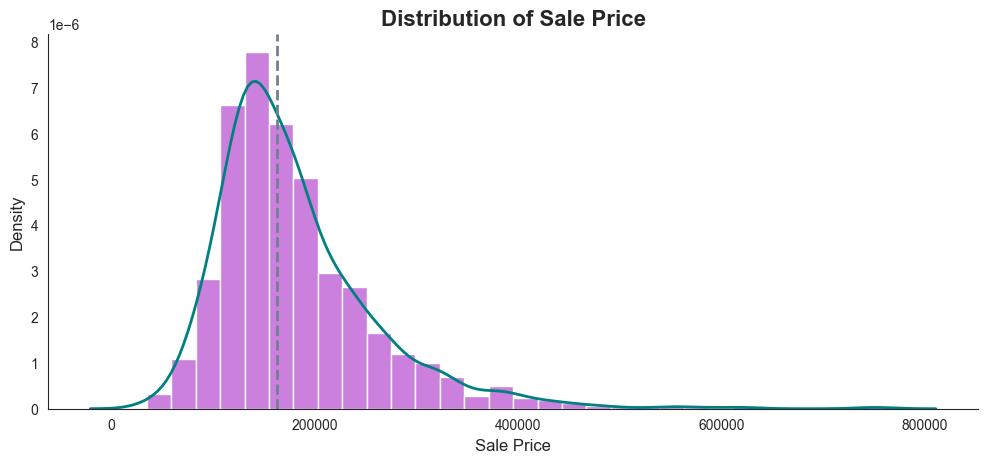

In [39]:
# Step 1: Set up the chart canvas
plt.figure(figsize=(12, 5))

# Step 2: Plot histogram (bars)
sns.histplot(
    x=df['SalePrice'],        # Use x= for compatibility
    bins=30,
    color='mediumorchid',
    stat='density'
)

# Step 3: Plot KDE curve (smooth line)
sns.kdeplot(
    x=df['SalePrice'],
    color='teal',
    linewidth=2
)

# Step 4: Median line
plt.axvline(df['SalePrice'].median(), color='slategray', linestyle='--', linewidth=2)

# Step 5: Title and labels
plt.title('Distribution of Sale Price', fontsize=16, fontweight='bold')
plt.xlabel('Sale Price', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Step 6: Layout cleanup
sns.despine()
plt.subplots_adjust(top=0.9, bottom=0.15)

# Step 7: Show chart
plt.show()


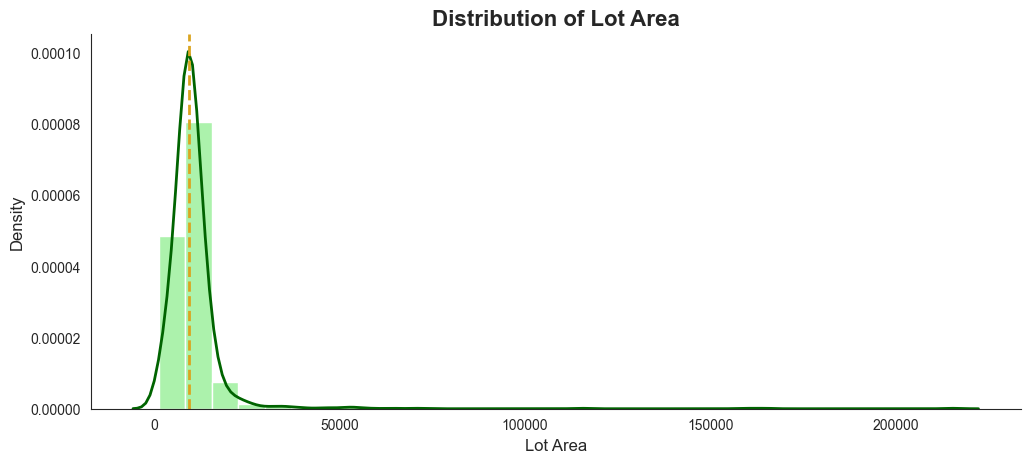

In [46]:
# Step 1: Set up the chart canvas
plt.figure(figsize=(12, 5))  # Wider layout for better bar visibility

# Step 2: Plot histogram (bars)
sns.histplot(
    x=df['LotArea'],          # Use x= for compatibility
    bins=30,                  # Adjust bins for smoother shape
    color='lightgreen',       # Histogram bars
    stat='density'            # Y-axis shows density
)

# Step 3: Plot KDE curve (smooth line)
sns.kdeplot(
    x=df['LotArea'],
    color='darkgreen',        # KDE curve
    linewidth=2
)

# Step 4: Median line
plt.axvline(df['LotArea'].median(), color='goldenrod', linestyle='--', linewidth=2)

# Step 5: Title and Labels
plt.title('Distribution of Lot Area', fontsize=16, fontweight='bold')
plt.xlabel('Lot Area', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Step 6: Layout cleanup
sns.despine()
plt.subplots_adjust(top=0.9, bottom=0.15)

# Step 7: Show chart
plt.show()


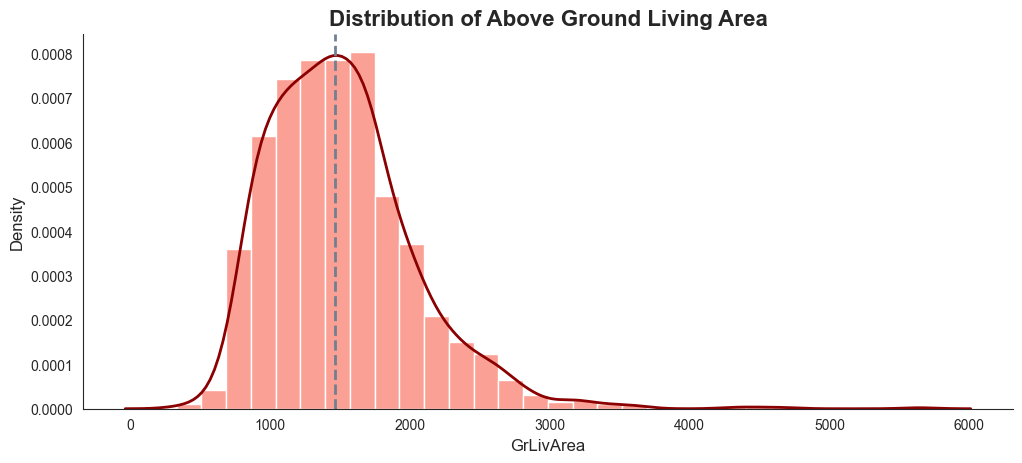

In [47]:
# Step 1: Set up the chart canvas
plt.figure(figsize=(12, 5))  # Wider layout for better bar visibility

# Step 2: Plot histogram (bars)
sns.histplot(
    x=df['GrLivArea'],         # Use x= for compatibility
    bins=30,                   # Adjust bins for smoother shape
    color='salmon',            # Histogram bars
    stat='density'             # Y-axis shows density
)

# Step 3: Plot KDE curve (smooth line)
sns.kdeplot(
    x=df['GrLivArea'],
    color='darkred',           # KDE curve
    linewidth=2
)

# Step 4: Median line
plt.axvline(df['GrLivArea'].median(), color='slategray', linestyle='--', linewidth=2)

# Step 5: Title and Labels
plt.title('Distribution of Above Ground Living Area', fontsize=16, fontweight='bold')
plt.xlabel('GrLivArea', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Step 6: Layout cleanup
sns.despine()
plt.subplots_adjust(top=0.9, bottom=0.15)

# Step 7: Show chart
plt.show()


In [ ]:
#  Multivariate Analysis 

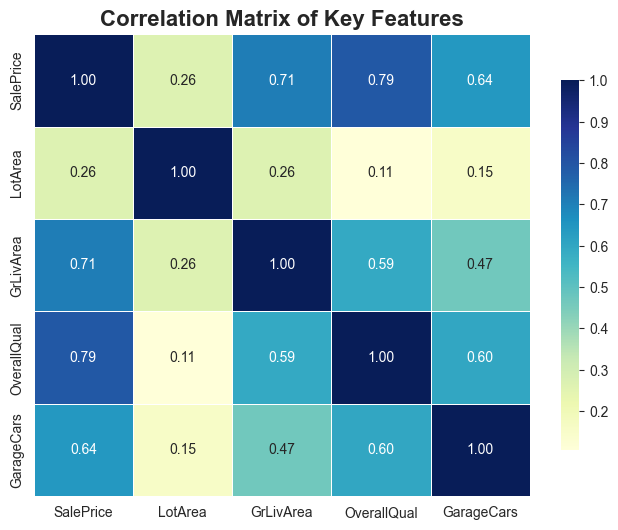

In [52]:
# Step 1: Selected relevant numeric features for multivariate analysis
features = ['SalePrice', 'LotArea', 'GrLivArea', 'OverallQual', 'GarageCars']

# Step 2: Compute correlation matrix to measure linear relationships
corr_matrix = df[features].corr()

# Step 3: Set up the chart canvas
plt.figure(figsize=(8, 6))  # Width = 8 inches, Height = 6 inches

# Step 4: Plot heatmap
sns.heatmap(
    corr_matrix,              # Matrix to visualize
    annot=True,               # Show correlation values
    cmap='YlGnBu',            # Blue-green palette
    fmt=".2f",                # Format numbers to 2 decimal places
    linewidths=0.5,           # Thin lines between cells
    cbar_kws={'shrink': 0.8}  # Shrink color bar for cleaner layout
)

# Step 5: title for clarity
plt.title('Correlation Matrix of Key Features', fontsize=16, fontweight='bold')

# Step 6: Show the chart
plt.show()

In [ ]:
# This heatmap shows how strongly different features are connected to each other.
# Higher numbers (like 0.79 between SalePrice and OverallQual) mean a strong relationship — when one goes up, the other usually does too.
# It helps, which features matter most when predicting house prices.

In [53]:
# Feature Engineering

In [55]:
# Step 1: Create PricePerSqFt
# Purpose: Shows how much buyers are paying per square foot of living space.
df['PricePerSqFt'] = df['SalePrice'] / df['GrLivArea']


# Step 2: Create HouseAge
# Purpose: Calculates how old the house was when it was sold.
df['HouseAge'] = df['YrSold'] - df['YearBuilt']


# Step 3: Create TotalBathrooms
# Purpose: Combines all bathrooms (full, half, basement) into one useful feature.
df['TotalBathrooms'] = (
    df['FullBath'] + df['HalfBath'] * 0.5 +
    df['BsmtFullBath'] + df['BsmtHalfBath'] * 0.5
)


# Step 4: Create HasPool
# Purpose: Flags whether the house has a pool (1 = Yes, 0 = No).
df['HasPool'] = df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)


# Step 5: Check New Columns
# Purpose: Preview, to confirm they were created correctly.
df[['PricePerSqFt', 'HouseAge', 'TotalBathrooms', 'HasPool']].head()


,PricePerSqFt,HouseAge,TotalBathrooms,HasPool
0,121.929825,5,3.5,0
1,143.819334,31,2.5,0
2,125.139978,7,3.5,0
3,81.537566,91,2.0,0
4,113.739763,8,3.5,0


In [59]:
# Check total missing values in each column
df.isnull().sum().sort_values(ascending=False).head(7)

Unnamed: 0      0
GarageCond      0
GarageArea      0
GarageCars      0
GarageFinish    0
GarageYrBlt     0
GarageType      0
dtype: int64

In [61]:
df[['PricePerSqFt','HouseAge','TotalBathrooms','HasPool']].describe()
# Check summary stats

,PricePerSqFt,HouseAge,TotalBathrooms,HasPool
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,120.572878,36.547945,2.210616,0.004795
std,31.391081,30.250152,0.785399,0.069100
min,28.358738,0.000000,1.000000,0.000000
25%,99.822008,8.000000,2.000000,0.000000
50%,120.099031,35.000000,2.000000,0.000000
75%,138.700041,54.000000,2.500000,0.000000
max,276.250881,136.000000,6.000000,1.000000


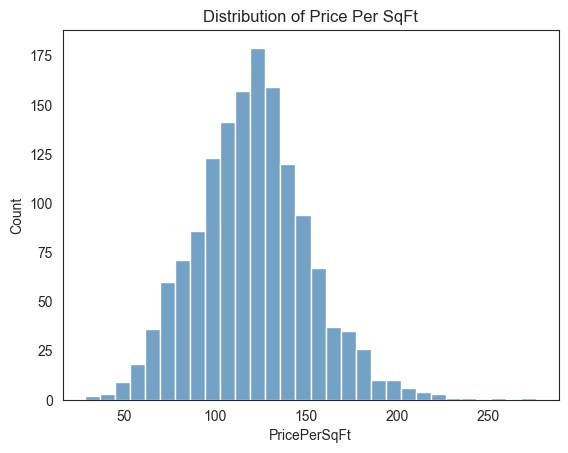

In [62]:
# Visualize the engineered features
sns.histplot(df['PricePerSqFt'], bins=30, color='steelblue')
plt.title('Distribution of Price Per SqFt')
plt.show()

In [63]:
# Check correlations with SalePrice
df[['SalePrice','PricePerSqFt','HouseAge','TotalBathrooms','HasPool']].corr()

,SalePrice,PricePerSqFt,HouseAge,TotalBathrooms,HasPool
SalePrice,1.000000,0.575505,-0.523350,0.631731,0.093708
PricePerSqFt,0.575505,1.000000,-0.554214,0.258520,-0.021405
HouseAge,-0.523350,-0.554214,1.000000,-0.522595,-0.008471
TotalBathrooms,0.631731,0.258520,-0.522595,1.000000,0.101358
HasPool,0.093708,-0.021405,-0.008471,0.101358,1.000000


In [64]:
# Decide on transformations
df['LogPricePerSqFt'] = np.log1p(df['PricePerSqFt'])

In [ ]:
# Feature Engineering and Size Impact

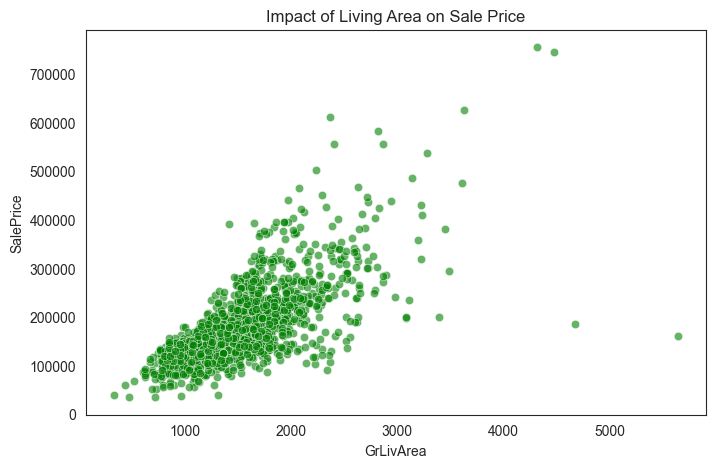

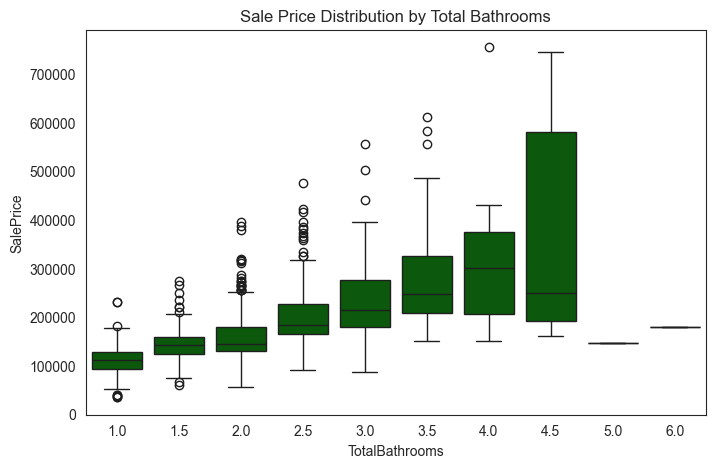

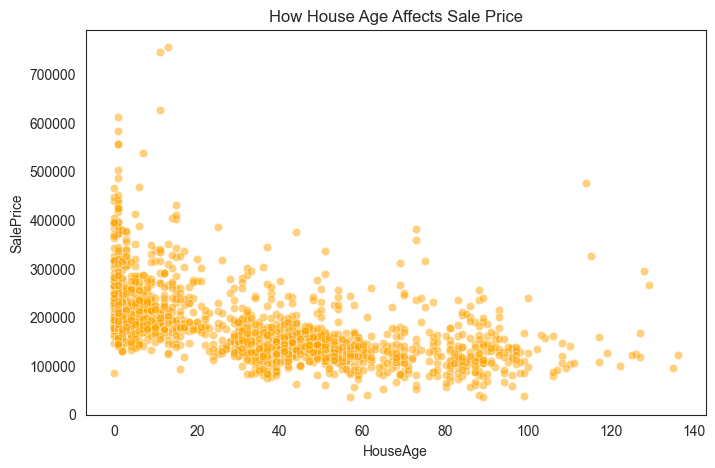

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Size Impact: Purpose - To see if price increases consistently as living area grows.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice', color='green', alpha=0.6)
plt.title('Impact of Living Area on Sale Price')
plt.show()




# 2. Bathroom Impact: Purpose - To visualize the value added by each additional bathroom.
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='TotalBathrooms', y='SalePrice', color='darkgreen')
plt.title('Sale Price Distribution by Total Bathrooms')
plt.show()



# 3. Age Impact: Purpose - To see if newer houses (lower age) command higher prices.
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='HouseAge', y='SalePrice', color='orange', alpha=0.5)
plt.title('How House Age Affects Sale Price')
plt.show()

In [ ]:
# Market Trends and Historical Pricing

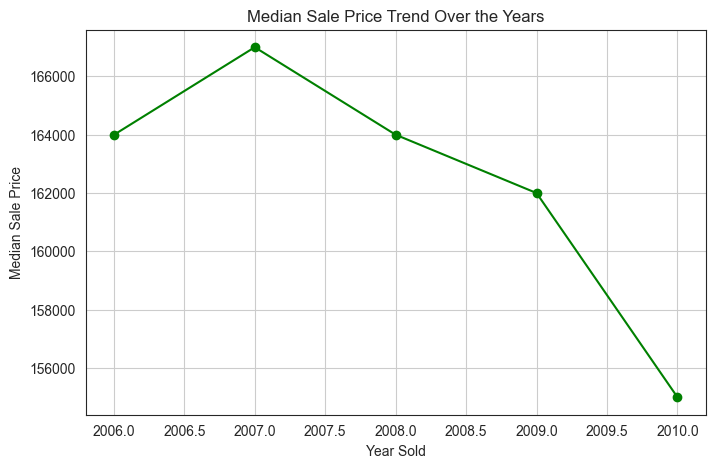

In [69]:
# Market Trends: Purpose - To identify if the housing market was growing or shrinking over the years.
plt.figure(figsize=(8, 5))
df.groupby('YrSold')['SalePrice'].median().plot(kind='line', marker='o', color='green')
plt.title('Median Sale Price Trend Over the Years')
plt.xlabel('Year Sold')
plt.ylabel('Median Sale Price')
plt.grid(True)
plt.show()

In [ ]:
# The median house price reached its peak in 2007 at approximately $167,000, followed by a significant downward trend till 2010.

In [ ]:
#  Customer Preferences and Amenities

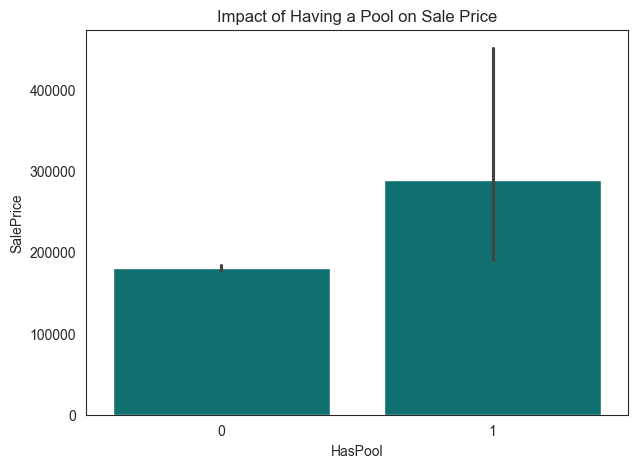

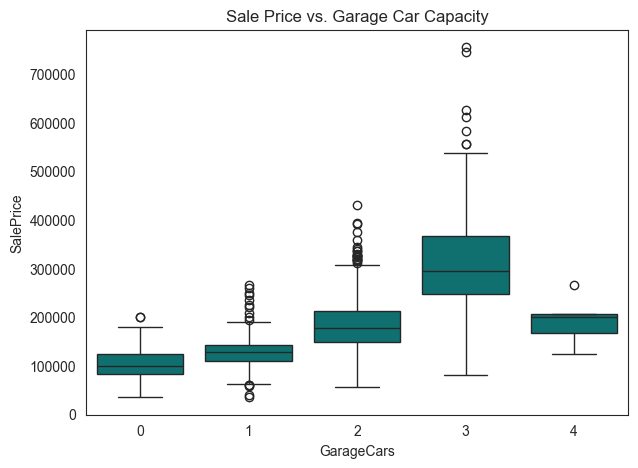

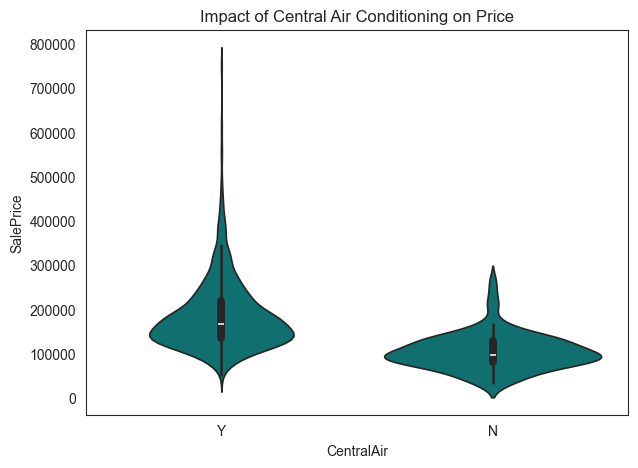

In [75]:
# 1. Pool Impact: Purpose - To see if having a pool significantly increases the property value.
plt.figure(figsize=(7, 5))
sns.barplot(data=df, x='HasPool', y='SalePrice', color='teal')
plt.title('Impact of Having a Pool on Sale Price')
plt.show()

# 2. Garage Impact: Purpose - To determine how the size of the garage (car capacity) influences price.
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='GarageCars', y='SalePrice', color='teal')
plt.title('Sale Price vs. Garage Car Capacity')
plt.show()

# 3. Central Air Impact: Purpose - To check the price difference between houses with and without Central Air.
plt.figure(figsize=(7, 5))
sns.violinplot(data=df, x='CentralAir', y='SalePrice', color='teal')
plt.title('Impact of Central Air Conditioning on Price')
plt.show()

In [76]:
# Final Step: Ranking the Most Important Features
# Purpose: To summarize which features have the strongest relationship with price.

correlations = df[['SalePrice', 'GrLivArea', 'TotalBathrooms', 'GarageCars', 'HouseAge']].corr()['SalePrice'].sort_values(ascending=False)

print("Top Features Influencing House Prices:")
print(correlations)

Top Features Influencing House Prices:
SalePrice         1.000000
GrLivArea         0.708624
GarageCars        0.640409
TotalBathrooms    0.631731
HouseAge         -0.523350
Name: SalePrice, dtype: float64
